In [1]:
%matplotlib inline

import time, random, datetime

# Importing these for manipulating data 
import numpy, pandas

# And importing these for visualising
import seaborn, matplotlib.pyplot as ploter, missingno

ploter.style.use('seaborn-whitegrid')

# SKLearn preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, label_binarize

# Importing some Machine learning modules
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

In [2]:
# Bringing in data and storing them as a 
train = pandas.read_csv('./Data/train.csv')
test = pandas.read_csv('./Data/test.csv')
gender_submission = pandas.read_csv('./Data/gender_submission.csv')

In [3]:
# Calling to view the head (first 5 rows of data) of the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Same as training data -- looking at first 5 rows of data.
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Now having a look at the provided example submisison dataframe
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
# Displays a bunch of handy statistics real easy.
# Ie, We see that the highest age was 80 years old, people had on average half a sibling/spouse, etc.
# Also we get a glimps that not all passengers had their age accounted for... so we have missing data that will perhaps impact our models design
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


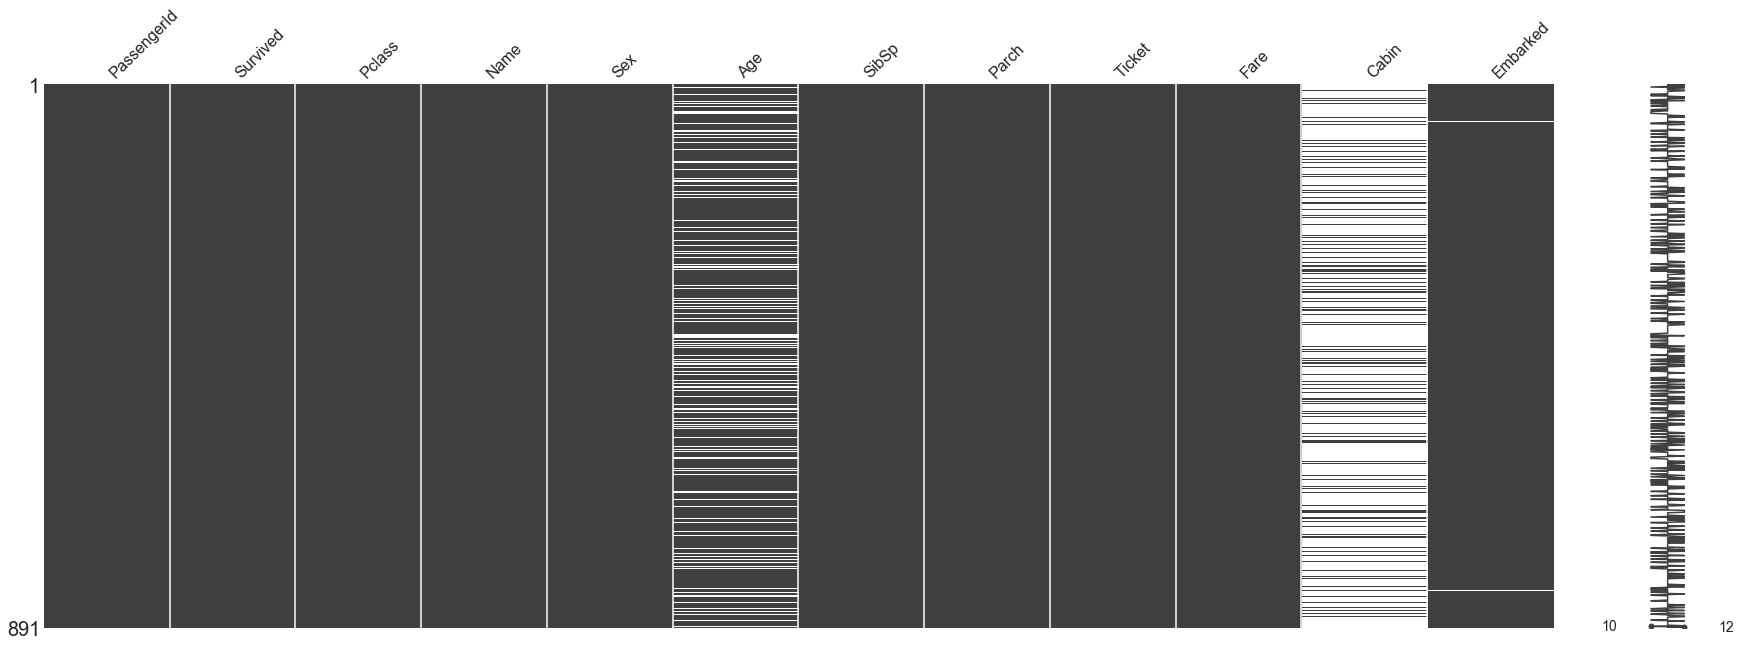

In [7]:
# Now, this will plot a graph of missing values - to better see what data we have missing.
missingno.matrix(train, figsize = (30,10))

In [15]:
df_bin = pandas.DataFrame() 
df_con = pandas.DataFrame() 

In [13]:
# Displays what are variable types my data columns that im working with.  
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


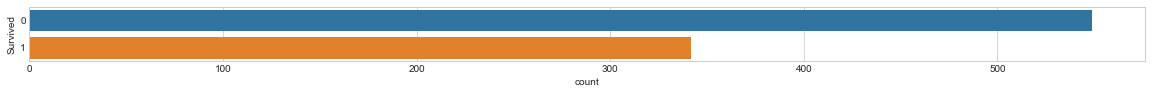

In [17]:
# Graphing how many people survived and how many unfortunatly didnt?
fig = ploter.figure(figsize=(20,1))
seaborn.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [20]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = numpy.where(df_bin['Sex'] == 'female', 1, 0)
df_con['Sex'] = train['Sex']

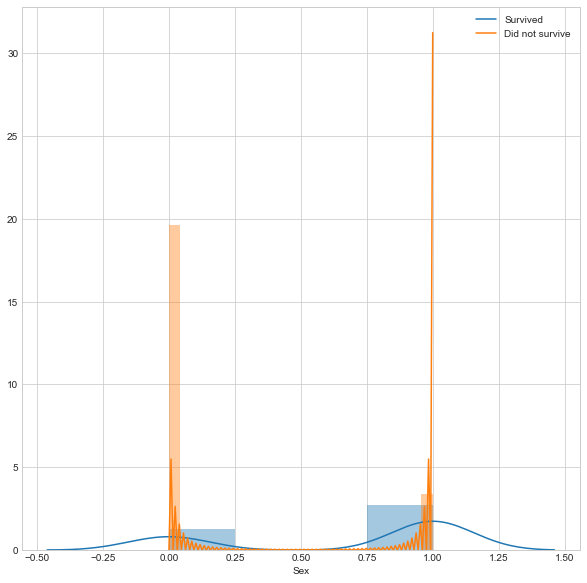

In [24]:
fig = ploter.figure(figsize=(10, 10))
seaborn.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
seaborn.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});